# compare glider and amseas

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
url_amseas = 'https://www.ncei.noaa.gov/thredds-coastal/dodsC/ncom_amseas_agg/AmSeas_Apr_05_2013_to_Current_best.ncd'
ds_amseas = xr.open_dataset(url_amseas)
ds_amseas

<xarray.Dataset>
Dimensions:                (depth: 40, lat: 814, lon: 1294, time: 19677)
Coordinates:
  * lon                    (lon) float64 262.0 262.0 262.1 ... 305.0 305.1 305.1
  * lat                    (lat) float64 5.0 5.033 5.067 ... 32.03 32.06 32.1
  * depth                  (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * time                   (time) datetime64[ns] 2013-04-05 ... 2020-10-24
    time_run               (time) datetime64[ns] ...
Data variables:
    surf_atm_press         (time, lat, lon) float32 ...
    surf_el                (time, lat, lon) float32 ...
    time_offset            (time) datetime64[ns] ...
    surf_temp_flux         (time, lat, lon) float32 ...
    surf_salt_flux         (time, lat, lon) float32 ...
    surf_solar_flux        (time, lat, lon) float32 ...
    surf_roughness         (time, lat, lon) float32 ...
    surf_wnd_stress_gridx  (time, lat, lon) float32 ...
    surf_wnd_stress_gridy  (time, lat, lon) float32 ...
    water_u                (time, depth, lat, lon) float32 ...
    water_v                (time, depth, lat, lon) float32 ...
    water_temp             (time, depth, lat, lon) float32 ...
    salinity               (time, depth, lat, lon) float32 ...
Attributes:
    initial_time:              2000010100
    classification_level:      
    classification_authority:  not applicable
    distribution_statement:    Approved for public release; distribution is u...
    Conventions:               CF-1.4, Ocean, Prediction, NetCDF, Convention,...
    classified_by:             not applicable
    derived_from:              not applicable
    downgrade_date:            not applicable
    releasable_to:             not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    contact:                   FNMOC, N5
    history:                   not applicable ;\nFMRC Best Dataset
    generating_model:          NCOM_4.3
    operational_status:        operational
    input_data_source:         not_applicable
    time_origin:               2020-10-19 00:00:00
    creator_name:              kelly.r.wood@navy.mil; jeffery.rayburn@navy.mil
    publisher_name:            OceanNOMADS@noaa.gov
    title:                     NAVO NCOM Relocatable Model: American Seas Reg...
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:AmSeas_Apr_05_2013_to_Current

In [3]:
from RU29_helpers import grid_glider

ru29 = grid_glider()


/Users/beaird/anaconda3/envs/IOO2020/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/beaird/anaconda3/envs/IOO2020/lib/python3.8/site-packages/scipy/stats/_binned_statistic.py:631: RuntimeWarning: Mean of empty slice
  result[vv, i] = statistic(values[vv, binnumbers == i])
/Users/beaird/anaconda3/envs/IOO2020/lib/python3.8/site-packages/scipy/stats/_binned_statistic.py:631: RuntimeWarning: Mean of empty slice
  result[vv, i] = statistic(values[vv, binnumbers == i])


In [4]:
ru29

<xarray.Dataset>
Dimensions:                (date: 706, depth: 199)
Coordinates:
  * date                   (date) datetime64[ns] 2020-09-08T16:45:31.84337305...
  * depth                  (depth) float64 2.5 7.5 12.5 ... 982.5 987.5 992.5
    lat                    (date) float64 18.18 18.18 18.18 ... 17.83 17.84
    lon                    (date) float64 -64.8 -64.81 -64.8 ... -64.8 -64.8
Data variables:
    u                      (date) float64 nan nan nan ... 0.01032 nan 0.0006698
    v                      (date) float64 nan nan nan ... nan -0.003105
    potential_temperature  (depth, date) float64 nan nan nan nan ... nan nan nan
    salinity               (depth, date) float64 nan nan nan nan ... nan nan nan
    cdom                   (depth, date) float64 nan nan nan nan ... nan nan nan
    chlorophyll_a          (depth, date) float64 nan nan nan nan ... nan nan nan
    beta_700nm             (depth, date) float64 nan nan nan nan ... nan nan nan

In [5]:
# subset the amseas model based on the glider times

amseas_deployed = ds_amseas.sel( time=slice(ru29.date.min().values, ru29.date.max().values ),
                               lon = slice(360 + ru29.lon.min().values, 360 + ru29.lon.max().values ),
                               lat = slice(ru29.lat.min().values, ru29.lat.max().values ) )




amseas_deployed

<xarray.Dataset>
Dimensions:                (depth: 40, lat: 23, lon: 31, time: 345)
Coordinates:
  * lon                    (lon) float64 295.0 295.1 295.1 ... 296.0 296.0 296.0
  * lat                    (lat) float64 17.43 17.47 17.5 ... 18.1 18.13 18.17
  * depth                  (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * time                   (time) datetime64[ns] 2020-09-08T18:00:00 ... 2020...
    time_run               (time) datetime64[ns] 2020-09-08 ... 2020-10-20
Data variables:
    surf_atm_press         (time, lat, lon) float32 ...
    surf_el                (time, lat, lon) float32 ...
    time_offset            (time) datetime64[ns] 2013-04-05T18:00:00 ... 2013...
    surf_temp_flux         (time, lat, lon) float32 ...
    surf_salt_flux         (time, lat, lon) float32 ...
    surf_solar_flux        (time, lat, lon) float32 ...
    surf_roughness         (time, lat, lon) float32 ...
    surf_wnd_stress_gridx  (time, lat, lon) float32 ...
    surf_wnd_stress_gridy  (time, lat, lon) float32 ...
    water_u                (time, depth, lat, lon) float32 ...
    water_v                (time, depth, lat, lon) float32 ...
    water_temp             (time, depth, lat, lon) float32 ...
    salinity               (time, depth, lat, lon) float32 ...
Attributes:
    initial_time:              2000010100
    classification_level:      
    classification_authority:  not applicable
    distribution_statement:    Approved for public release; distribution is u...
    Conventions:               CF-1.4, Ocean, Prediction, NetCDF, Convention,...
    classified_by:             not applicable
    derived_from:              not applicable
    downgrade_date:            not applicable
    releasable_to:             not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    contact:                   FNMOC, N5
    history:                   not applicable ;\nFMRC Best Dataset
    generating_model:          NCOM_4.3
    operational_status:        operational
    input_data_source:         not_applicable
    time_origin:               2020-10-19 00:00:00
    creator_name:              kelly.r.wood@navy.mil; jeffery.rayburn@navy.mil
    publisher_name:            OceanNOMADS@noaa.gov
    title:                     NAVO NCOM Relocatable Model: American Seas Reg...
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:AmSeas_Apr_05_2013_to_Current

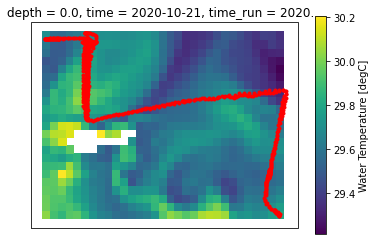

In [8]:
plt.axes( projection = ccrs.Mercator())
plt.plot( ru29.lon, ru29.lat, 'r.', transform = ccrs.PlateCarree() )
amseas_deployed.water_temp.sel(depth = 0, time = '10-21-2020 00:00',  method='nearest').plot( transform = ccrs.PlateCarree())

# want to try interpolating onto the glider

https://xesmf.readthedocs.io/en/latest/notebooks/Using_LocStream.html

In [ ]:
# try interpolation

amseas_deployed.interp(time = ru29.date, lon = ru29.lon , lat = ru29.lat, depth = ru29.depth)